# Example use of dclut

In [1]:
import numpy as np
import xarray as xr
import matplotlib.pyplot as plt
from dclut import dclut, create_dclut

In [2]:
bin_path = "D:\\SortingTemp\\24-05-31_DH23_A1-IC_g0\\24-05-31_DH23_A1-IC_g0_imec0\\24-05-31_DH23_A1-IC_g0_t0.imec0.ap.bin"
dcl_path = create_dclut(bin_path, [-1, 385], scale_names=['time', 'channel'], 
                       scale_types=['linear', 'index'], scale_units=['seconds', 'none'], 
                       scale_vals=[[1/30000, 0], None])

In [3]:
dcl_obj = dclut(dcl_path)
print(dcl_obj)

File: 24-05-31_DH23_A1-IC_g0_t0.imec0.ap.bin
Type: binary
Shape: [810401990, 385]
----------------

Data: data (au)
Type: int16
Scales:

  time (seconds)
  ----
  dimension: 0
  type: linear
  min: 0.0
  max: 27013.399633333334

  channel (none)
  -------
  dimension: 1
  type: index
  min: 0
  max: 384

  s0 (au)
  --
  dimension: 0
  type: index
  min: 0
  max: 810401989

  s1 (au)
  --
  dimension: 1
  type: index
  min: 0
  max: 384



In [4]:
dcl_obj.scale_values('time', indices=[0,1])

array([0.00000000e+00, 3.33333333e-05])

In [5]:
dcl_obj.intervals('time', np.array([[-1, 2], [3, 4]]))
dcl_obj._selection

{0: [[slice(0, 60000, None), slice(90000, 120000, None)]], 1: None}

In [6]:
dcl_obj.points('channel', np.array([50, 384]))
dcl_obj._selection

{0: [[slice(0, 60000, None), slice(90000, 120000, None)]],
 1: [[array([ 50, 384], dtype=int64)]]}

In [7]:
dcl_obj.intervals('time', np.array([[1, 2]]))
dcl_obj._selection

{0: [[slice(0, 60000, None), slice(90000, 120000, None)],
  [slice(30000, 60000, None)]],
 1: [[array([ 50, 384], dtype=int64)]]}

In [8]:
test2 = dcl_obj.read(mode='intersection')

In [9]:
dcl_obj.reset()

In [10]:
dcl_obj.intervals('time', [[[0, 10]]]).points('channel', 384)
dcl_obj._selection


{0: [[slice(0, 300000, None)]], 1: [[array([384], dtype=int64)]]}

In [11]:
sync = dcl_obj.read(format='xarray')

In [12]:
sync

<xarray.DataArray (time: 300000, channel: 1)> Size: 600kB
array([[64],
       [64],
       [64],
       ...,
       [64],
       [64],
       [64]], dtype=int16)
Coordinates:
  * time     (time) float64 2MB 0.0 3.333e-05 6.667e-05 ... 10.0 10.0 10.0
  * channel  (channel) int64 8B 384
    s0       (time) int64 2MB 0 1 2 3 4 5 ... 299995 299996 299997 299998 299999
    s1       (channel) int64 8B 384

In [13]:
dcl_obj._selection

{0: [[slice(0, 300000, None)]], 1: [[array([384], dtype=int64)]]}

In [14]:
dcl_obj.reset()
test_empty = dcl_obj.read(format='xarray')
test_empty

In [15]:
dcl_obj.reset(1)
dcl_obj.points('channel', [[100, 200, 384]])
test = dcl_obj.read(format='xarray')
test.plot(x='time', hue='channel')

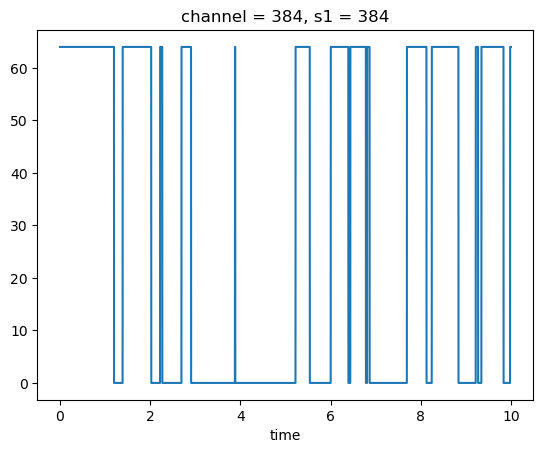

In [ ]:
sync.plot()